In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics

%matplotlib inline

In [3]:
dm = pd.read_csv('dmtest_final.csv')
dm = dm.drop(columns=['Unnamed: 0'])
dm.head()

,location,nm,p_nm,ne,p_ne,ns,p_ns,nl,p_nl,me,...,ms,p_ms,ml,p_ml,es,p_es,el,p_el,sl,p_sl
0,649.0,3.546045,0.000428,-0.408963,0.682741,4.093780,0.000049,3.966777,8.343337e-05,-5.142984,...,1.593227,1.117374e-01,1.036569,0.300435,6.100975,2.105414e-09,4.826646,1.844483e-06,0.518004,6.046832e-01
1,657.0,-0.275268,0.783223,-4.652335,0.000004,-2.602655,0.009523,3.533407,4.480571e-04,-4.447895,...,-2.760637,5.979560e-03,3.911994,0.000104,4.479601,9.264363e-06,5.988023,4.045203e-09,5.844916,9.120505e-09
2,660.0,2.136547,0.033117,-1.871715,0.061826,-1.547532,0.122364,2.824611,4.921779e-03,-11.416242,...,-10.893467,5.907835e-25,2.534696,0.011557,2.743397,6.297782e-03,12.156039,5.462983e-30,12.626319,6.112249e-32
3,705.0,4.126811,0.000043,1.297692,0.194988,2.859547,0.004419,4.979523,8.774295e-07,-6.109131,...,-3.521727,4.677639e-04,3.671329,0.000267,4.854340,1.614548e-06,6.625135,8.940581e-11,5.660855,2.533942e-08
4,709.0,2.343784,0.028098,2.281848,0.032076,-4.923383,0.000056,2.991030,6.526270e-03,1.126822,...,-5.583782,1.109549e-05,2.430890,0.023267,-5.604969,1.053732e-05,2.327757,2.908144e-02,6.325615,1.870059e-06


In [12]:
dm['best'] = ''

for i in range(len(dm)):
    
    if (dm.nl[i] > 0) & (dm.p_nl[i] < 0.05) & (dm.ml[i] > 0) & (dm.p_ml[i] < 0.05)\
        & (dm.el[i] > 0) & (dm.p_el[i] < 0.05) & (dm.sl[i] > 0) & (dm.p_sl[i] < 0.05):
        
        dm['best'][i] = 'LSTM'
        
    if (dm.ns[i] > 0) & (dm.p_ns[i] < 0.05) & (dm.ms[i] > 0) & (dm.p_ms[i] < 0.05)\
        & (dm.es[i] > 0) & (dm.p_es[i] < 0.05) & (dm.sl[i] < 0) & (dm.p_sl[i] < 0.05):
        
        dm['best'][i] = 'SARIMA'
        
    if (dm['ne'][i] > 0) & (dm['p_ne'][i] < 0.05) & (dm['me'][i] > 0) & (dm['p_me'][i] < 0.05)\
        & (dm['es'][i] < 0) & (dm['p_es'][i] < 0.05) & (dm['el'][i] < 0) & (dm['p_el'][i] < 0.05):
        
        dm['best'][i] = 'HoltWinter'
        
    if (dm.nm[i] > 0) & (dm.p_nm[i] < 0.05) & (dm.me[i] < 0) & (dm.p_me[i] < 0.05)\
        & (dm.ms[i] < 0) & (dm.p_ms[i] < 0.05) & (dm.ml[i] < 0) & (dm.p_ml[i] < 0.05):
        
        dm['best'][i] = 'MovAvg'
        
    if (dm.nl[i] < 0) & (dm.p_nl[i] < 0.05) & (dm.ns[i] < 0) & (dm.p_ns[i] < 0.05)\
        & (dm['ne'][i] < 0) & (dm.p_ne[i] < 0.05) & (dm['nm'][i] < 0) & (dm.p_nm[i] < 0.05):
        
        dm['best'][i] = 'Naive'
        

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarn

In [19]:
dm_temp = dm[['location', 'best']]

dm_temp['excLSTM'] = ''

for i in range(len(dm)):
        
    if (dm.ns[i] > 0) & (dm.p_ns[i] < 0.05) & (dm.ms[i] > 0) & (dm.p_ms[i] < 0.05) & (dm.es[i] > 0) & (dm.p_es[i] < 0.05):
        
        dm_temp['excLSTM'][i] = 'SARIMA'
        
    if (dm['ne'][i] > 0) & (dm.p_ne[i] < 0.05) & (dm['me'][i] > 0) & (dm.p_me[i] < 0.05) & (dm['es'][i] < 0) & (dm.p_es[i] < 0.05):
        
        dm_temp['excLSTM'][i] = 'HoltWinter'
        
    if (dm.nm[i] > 0) & (dm.p_nm[i] < 0.05) & (dm.me[i] < 0) & (dm.p_me[i] < 0.05) & (dm.ms[i] < 0) & (dm.p_ms[i] < 0.05):
        
        dm_temp['excLSTM'][i] = 'MovAvg'
        
    if (dm.ns[i] < 0) & (dm.p_ns[i] < 0.05) & (dm['ne'][i] < 0) & (dm.p_ne[i] < 0.05) & (dm.nm[i] < 0) & (dm.p_nm[i] < 0.05):
        
        dm_temp['excLSTM'][i] = 'Naive'
        

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [16]:
pred_accuracy = pd.read_csv('pred_accuracy_final.csv')
pred_accuracy = pred_accuracy.drop(columns=['Unnamed: 0'])
pred_accuracy.head()

,location,Naive,Moving_Average,Expoential_Smoothing,SARIMA,LSTM
0,649.0,152.446447,126.736308,155.839159,123.081832,119.733967
1,657.0,115.470451,117.050864,149.063380,128.964391,90.084942
2,660.0,121.518827,98.962515,139.913709,136.558083,89.530249
3,705.0,271.650142,210.870070,251.154268,226.985080,184.235458
4,709.0,953.031099,718.172147,659.167248,1785.860576,442.999469


In [17]:
dm_temp['orig_best'] = ''

for i in range(len(pred_accuracy)):
    if pred_accuracy.LSTM[i] < min(pred_accuracy.Naive[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.SARIMA[i]):
        dm_temp['1'][i] = 'LSTM'
    
    if pred_accuracy.SARIMA[i] < min(pred_accuracy.Naive[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.LSTM[i] ):
        dm_temp['1'][i] = 'SARIMA'
        
    if pred_accuracy.Expoential_Smoothing[i] < min(pred_accuracy.Naive[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.LSTM[i], pred_accuracy.SARIMA[i]):
        dm_temp['1'][i] = 'HoltWinter'
        
    if pred_accuracy.Moving_Average[i] < min(pred_accuracy.Naive[i], pred_accuracy.LSTM[i], 
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.SARIMA[i]):
        dm_temp['1'][i] = 'MovAvg'
        
    if pred_accuracy.Naive[i] < min(pred_accuracy.LSTM[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.SARIMA[i]):
        dm_temp['1'][i] = 'Naive'

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\Anaconda3\envs\urbsim\lib\site-packages\IPython\core\interactiveshell.py:3427: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [18]:
dm_temp['orig_excLSTM'] = ''

for i in range(len(pred_accuracy)):
    
    if pred_accuracy.SARIMA[i] < min(pred_accuracy.Naive[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.Expoential_Smoothing[i]):
        dm_temp['2'][i] = 'SARIMA'
        
    if pred_accuracy.Expoential_Smoothing[i] < min(pred_accuracy.Naive[i], pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.SARIMA[i]):
        dm_temp['2'][i] = 'HoltWinter'
        
    if pred_accuracy.Moving_Average[i] < min(pred_accuracy.Naive[i],
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.SARIMA[i]):
        dm_temp['2'][i] = 'MovAvg'
        
    if pred_accuracy.Naive[i] < min(pred_accuracy.Moving_Average[i], 
                                    pred_accuracy.Expoential_Smoothing[i], pred_accuracy.SARIMA[i]):
        dm_temp['2'][i] = 'Naive'

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [20]:
dm_temp

In [ ]:
dm_temp.to_csv('dm_final.csv')

## Model Analysis

In [21]:
comp = pd.read_csv('dm_final.csv')
comp = comp.drop(columns=['Unnamed: 0'])
comp.index = comp.location
comp

,location,best,excLSTM,orig_best,orig_excLSTM
location,,,,,
649.0,649.0,NaN,NaN,LSTM,SARIMA
657.0,657.0,LSTM,NaN,LSTM,Naive
660.0,660.0,LSTM,MovAvg,LSTM,MovAvg
705.0,705.0,LSTM,MovAvg,LSTM,MovAvg
709.0,709.0,LSTM,NaN,LSTM,HoltWinter
...,...,...,...,...,...
114.0,114.0,LSTM,NaN,LSTM,MovAvg
115.0,115.0,LSTM,SARIMA,LSTM,SARIMA
116.0,116.0,LSTM,HoltWinter,LSTM,HoltWinter


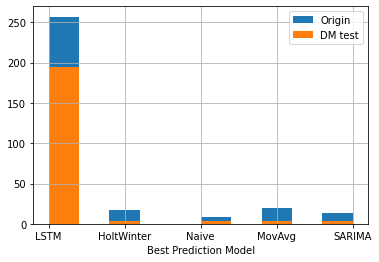

In [26]:
comp['orig_best'].hist(label = 'Original')
comp['best'].hist(label = 'DM test')
plt.xlabel('Best Prediction Model')
plt.legend(loc = 'best')

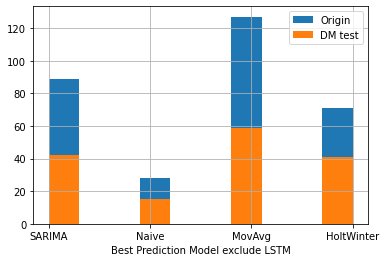

In [27]:
comp['orig_excLSTM'].hist(label = 'Original')
comp['excLSTM'].hist(label = 'DM test')
plt.xlabel('Best Prediction Model exclude LSTM')
plt.legend(loc = 'best')

### 1. Distributions of FF in Locations with Diff Best Models

In [59]:
ff = pd.read_csv('stackfootfall.csv')
ff = ff.drop(columns=['Unnamed: 0'])
ff.timestamp = pd.to_datetime(ff.timestamp, format = '%Y-%m-%d %H:%M:%S')

In [60]:
ff = ff.loc[(ff.timestamp >= '2018-01') & (ff.timestamp <= '2019-08-18 23:00')]

In [61]:
comp = comp.reset_index(drop=True)
comp

,location,best,excLSTM,orig_best,orig_excLSTM
0,649.0,NaN,NaN,LSTM,SARIMA
1,657.0,LSTM,NaN,LSTM,Naive
2,660.0,LSTM,MovAvg,LSTM,MovAvg
3,705.0,LSTM,MovAvg,LSTM,MovAvg
4,709.0,LSTM,NaN,LSTM,HoltWinter
...,...,...,...,...,...
310,114.0,LSTM,NaN,LSTM,MovAvg
311,115.0,LSTM,SARIMA,LSTM,SARIMA
312,116.0,LSTM,HoltWinter,LSTM,HoltWinter
313,117.0,LSTM,MovAvg,LSTM,MovAvg


In [62]:
ff = pd.merge(ff, comp, how = 'inner', on = 'location')
ff.head()

,timestamp,location,device,footfall,year,month,day,hour,day_of_week,best,excLSTM,orig_best,orig_excLSTM
0,2018-01-01 00:00:00,5.0,1780.0,494.0,2018,1,1,0,1,LSTM,MovAvg,LSTM,MovAvg
1,2018-01-01 01:00:00,5.0,1780.0,899.0,2018,1,1,1,1,LSTM,MovAvg,LSTM,MovAvg
2,2018-01-01 02:00:00,5.0,1780.0,770.0,2018,1,1,2,1,LSTM,MovAvg,LSTM,MovAvg
3,2018-01-01 03:00:00,5.0,1780.0,599.0,2018,1,1,3,1,LSTM,MovAvg,LSTM,MovAvg
4,2018-01-01 04:00:00,5.0,1780.0,331.0,2018,1,1,4,1,LSTM,MovAvg,LSTM,MovAvg


In [63]:
ff_LSTM = ff.loc[ff.best == 'LSTM']
ff_MovAvg = ff.loc[ff.best == 'MovAvg']
ff_SARIMA = ff.loc[ff.best == 'SARIMA']
ff_HoltWinter = ff.loc[ff.best == 'HoltWinter']
ff_Naive = ff.loc[ff.best == 'Naive']

ff_LSTMsum = ff_LSTM.groupby('timestamp')['footfall'].mean().to_frame()
ff_MovAvgsum = ff_MovAvg.groupby('timestamp')['footfall'].mean().to_frame()
ff_SARIMAsum = ff_SARIMA.groupby('timestamp')['footfall'].mean().to_frame()
ff_HoltWintersum = ff_HoltWinter.groupby('timestamp')['footfall'].mean().to_frame()
ff_Naivesum = ff_Naive.groupby('timestamp')['footfall'].mean().to_frame()

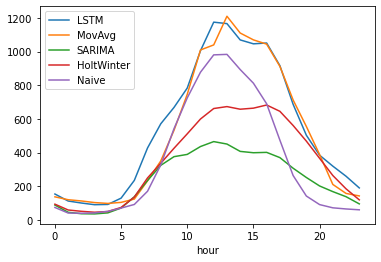

In [64]:
ff.loc[ff.best == 'LSTM'].groupby('hour')['footfall'].mean().plot.line(label = 'LSTM')
ff.loc[ff.best == 'MovAvg'].groupby('hour')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.best == 'SARIMA'].groupby('hour')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.best == 'HoltWinter'].groupby('hour')['footfall'].mean().plot.line(label = 'HoltWinter')
ff.loc[ff.best == 'Naive'].groupby('hour')['footfall'].mean().plot.line(label = 'Naive')
plt.legend(loc = 'best')

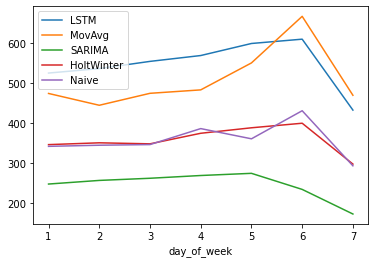

In [65]:
ff.loc[ff.best == 'LSTM'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'LSTM')
ff.loc[ff.best == 'MovAvg'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.best == 'SARIMA'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.best == 'HoltWinter'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'HoltWinter')
ff.loc[ff.best == 'Naive'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'Naive')
plt.legend(loc = 'best')

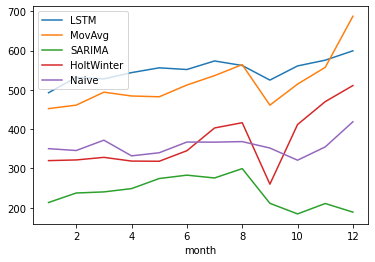

In [66]:
ff.loc[ff.best == 'LSTM'].groupby('month')['footfall'].mean().plot.line(label = 'LSTM')
ff.loc[ff.best == 'MovAvg'].groupby('month')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.best == 'SARIMA'].groupby('month')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.best == 'HoltWinter'].groupby('month')['footfall'].mean().plot.line(label = 'HoltWinter')
ff.loc[ff.best == 'Naive'].groupby('month')['footfall'].mean().plot.line(label = 'Naive')
plt.legend(loc = 'best')

In [67]:
daily_LSTM = ff_LSTMsum.resample('D').mean()
weekly_LSTM = ff_LSTMsum.resample('W').mean()
monthly_LSTM = ff_LSTMsum.resample('M').mean()

daily_MovAvg = ff_MovAvgsum.resample('D').mean()
weekly_MovAvg = ff_MovAvgsum.resample('W').mean()
monthly_MovAvg = ff_MovAvgsum.resample('M').mean()

daily_SARIMA = ff_SARIMAsum.resample('D').mean()
weekly_SARIMA = ff_SARIMAsum.resample('W').mean()
monthly_SARIMA = ff_SARIMAsum.resample('M').mean()

daily_HoltWinter = ff_HoltWintersum.resample('D').mean()
weekly_HoltWinter = ff_HoltWintersum.resample('W').mean()
monthly_HoltWinter = ff_HoltWintersum.resample('M').mean()

daily_Naive = ff_Naivesum.resample('D').mean()
weekly_Naive = ff_Naivesum.resample('W').mean()
monthly_Naive = ff_Naivesum.resample('M').mean()

In [68]:
daily_LSTM['LSTM'] = ff_LSTMsum.resample('D').mean()
weekly_LSTM['LSTM'] = ff_LSTMsum.resample('W').mean()
monthly_LSTM['LSTM'] = ff_LSTMsum.resample('M').mean()

daily_MovAvg['MovAvg'] = ff_MovAvgsum.resample('D').mean()
weekly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('W').mean()
monthly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('M').mean()

daily_SARIMA['SARIMA'] = ff_SARIMAsum.resample('D').mean()
weekly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('W').mean()
monthly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('M').mean()

daily_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('D').mean()
weekly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('W').mean()
monthly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('M').mean()

daily_Naive['Naive'] = ff_Naivesum.resample('D').mean()
weekly_Naive['Naive'] = ff_Naivesum.resample('W').mean()
monthly_Naive['Naive'] = ff_Naivesum.resample('M').mean()

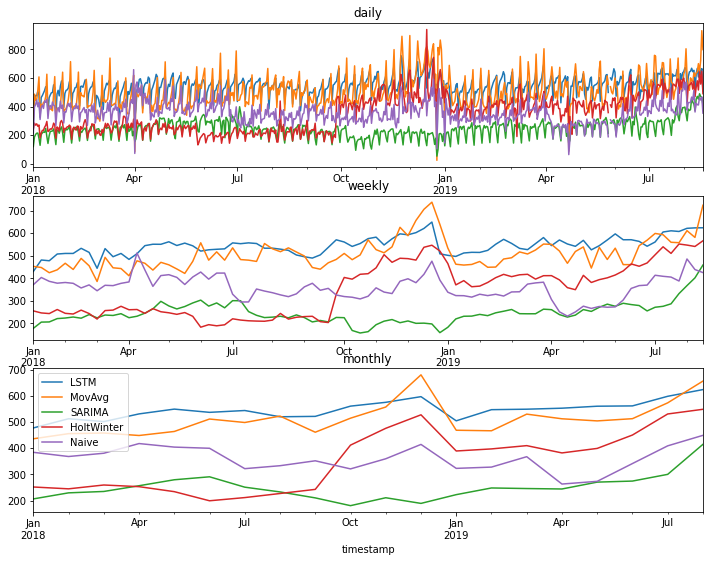

In [69]:
fig,axs = plt.subplots(3,1)
daily_LSTM['LSTM'].plot(figsize = (12,9),title = 'daily', label = 'LSTM', ax = axs[0])
daily_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'daily', label = 'MovAvg', ax = axs[0])
daily_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'daily', label = 'SARIMA', ax = axs[0])
daily_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'daily', label = 'HoltWinter', ax = axs[0])
daily_Naive['Naive'].plot(figsize = (12,9),title = 'daily', label = 'Naive', ax = axs[0])

weekly_LSTM['LSTM'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_Naive['Naive'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])

monthly_LSTM['LSTM'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_Naive['Naive'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])

plt.legend(loc = 'best')

### 2. Distributions of FF in Locations with Diff Best Models (exclude LSTM)

In [70]:
ff_MovAvg = ff.loc[ff.excLSTM == 'MovAvg']
ff_SARIMA = ff.loc[ff.excLSTM == 'SARIMA']
ff_Naive = ff.loc[ff.excLSTM == 'Naive']
ff_HoltWinter = ff.loc[ff.excLSTM == 'HoltWinter']

In [71]:
ff_MovAvgsum = ff_MovAvg.groupby('timestamp')['footfall'].mean().to_frame()
ff_SARIMAsum = ff_SARIMA.groupby('timestamp')['footfall'].mean().to_frame()
ff_Naivesum = ff_Naive.groupby('timestamp')['footfall'].mean().to_frame()
ff_HoltWintersum = ff_HoltWinter.groupby('timestamp')['footfall'].mean().to_frame()

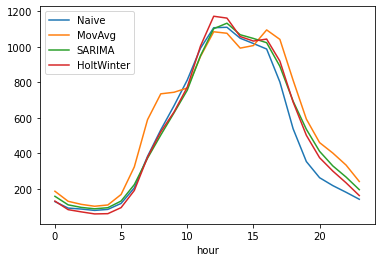

In [72]:
ff.loc[ff.excLSTM == 'Naive'].groupby('hour')['footfall'].mean().plot.line(label = 'Naive')
ff.loc[ff.excLSTM == 'MovAvg'].groupby('hour')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.excLSTM == 'SARIMA'].groupby('hour')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.excLSTM == 'HoltWinter'].groupby('hour')['footfall'].mean().plot.line(label = 'HoltWinter')
plt.legend(loc = 'best')

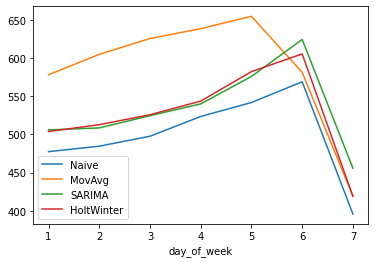

In [73]:
ff.loc[ff.excLSTM == 'Naive'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'Naive')
ff.loc[ff.excLSTM == 'MovAvg'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.excLSTM == 'SARIMA'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.excLSTM == 'HoltWinter'].groupby('day_of_week')['footfall'].mean().plot.line(label = 'HoltWinter')
plt.legend(loc = 'best')

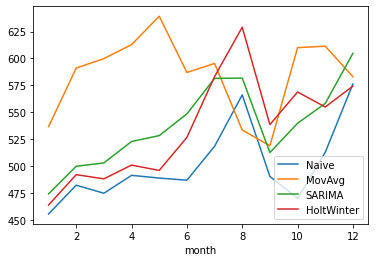

In [74]:
ff.loc[ff.excLSTM == 'Naive'].groupby('month')['footfall'].mean().plot.line(label = 'Naive')
ff.loc[ff.excLSTM == 'MovAvg'].groupby('month')['footfall'].mean().plot.line(label = 'MovAvg')
ff.loc[ff.excLSTM == 'SARIMA'].groupby('month')['footfall'].mean().plot.line(label = 'SARIMA')
ff.loc[ff.excLSTM == 'HoltWinter'].groupby('month')['footfall'].mean().plot.line(label = 'HoltWinter')
plt.legend(loc = 'best')

In [75]:
daily_Naive['Naive'] = ff_Naivesum.resample('D').mean()
weekly_Naive['Naive'] = ff_Naivesum.resample('W').mean()
monthly_Naive['Naive'] = ff_Naivesum.resample('M').mean()

daily_MovAvg['MovAvg'] = ff_MovAvgsum.resample('D').mean()
weekly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('W').mean()
monthly_MovAvg['MovAvg'] = ff_MovAvgsum.resample('M').mean()

daily_SARIMA['SARIMA'] = ff_SARIMAsum.resample('D').mean()
weekly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('W').mean()
monthly_SARIMA['SARIMA'] = ff_SARIMAsum.resample('M').mean()

daily_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('D').mean()
weekly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('W').mean()
monthly_HoltWinter['HoltWinter'] = ff_HoltWintersum.resample('M').mean()

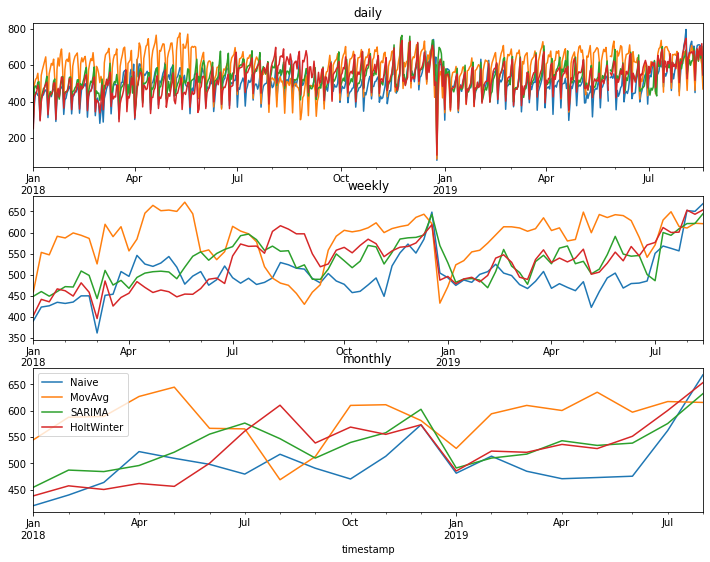

In [76]:
fig,axs = plt.subplots(3,1)
daily_Naive['Naive'].plot(figsize = (12,9),title = 'daily', label = 'Naive', ax = axs[0])
daily_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'daily', label = 'MovAvg', ax = axs[0])
daily_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'daily', label = 'SARIMA',ax = axs[0])
daily_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'daily', label = 'HoltWinter',ax = axs[0])

weekly_Naive['Naive'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])
weekly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'weekly', ax = axs[1])

monthly_Naive['Naive'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_MovAvg['MovAvg'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_SARIMA['SARIMA'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])
monthly_HoltWinter['HoltWinter'].plot(figsize = (12,9),title = 'monthly', ax = axs[2])

plt.legend(loc = 'best')